# 第5章 記述子を使った特性予測

## 5. 1 特性を予測すること

## 5. 2 データの前処理

rdkitのインストール

In [ ]:
pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 35.2 MB/s eta 0:00:00


ライブラリのインポート

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem

sklearnでモデルを構築した際に出るエラーを非表示にする

Google Driveのマウント

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/MyDrive/Cheminformatics")
print(os.getcwd())

/content/drive/MyDrive/Cheminformatics


## 特性の予測について

## データの前処理

In [ ]:
df = pd.read_csv("logS_train.csv", index_col=0)
print(df.shape)
df.head()

(658, 211)


,LogS(mols/L),MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
TRAINING SET INDEX,,,,,,,,,,,,,,,,,,,,,
1,-6.237,5.614081,5.614081,0.597236,-2.726796,0.327494,12.074074,466.479,446.319,465.990822,...,0,0,0,0,0,0,0,0,0,0
2,-3.800,11.942019,11.942019,0.161193,-0.588430,0.760294,41.318182,302.458,272.218,302.224580,...,0,0,0,0,0,0,0,0,0,0
3,-4.630,2.248843,2.248843,1.232824,1.232824,0.546961,14.000000,154.212,144.132,154.078250,...,0,0,0,0,0,0,0,0,0,0
4,-3.960,2.178241,2.178241,1.342593,1.342593,0.463217,12.666667,152.196,144.132,152.062600,...,0,0,0,0,0,0,0,0,0,0
5,0.540,11.169907,11.169907,0.347654,-2.920139,0.633379,16.000000,183.169,173.089,183.012449,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df.iloc[:, 1:]
print(X_train.shape)

y_train = df["LogS(mols/L)"]

(658, 210)


トレーニングデータの欠損値を確認する

In [ ]:
X_train.isna().any()

,0
MaxAbsEStateIndex,False
MaxEStateIndex,False
MinAbsEStateIndex,False
MinEStateIndex,False
qed,False
...,...
fr_thiazole,False
fr_thiocyan,False
fr_thiophene,False
fr_unbrch_alkane,False


In [ ]:
X_train_na = X_train.loc[:, X_train.isna().any()]
X_train_na.describe()

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,0.220877,-0.386973,0.392409,0.216923,25.419926,10.105888,2.180439,-2.157604,2.278721,-2.144046,6.441627,0.338402
std,0.122036,0.175393,0.172992,0.114980,16.393346,0.307138,0.240820,0.221035,0.236981,0.279813,1.256193,0.642800
min,-0.053306,-0.800048,0.049564,0.000729,13.941691,9.412682,1.404532,-2.804032,1.321295,-3.033245,4.468459,-0.769086
25%,0.118764,-0.481230,0.326338,0.116562,16.259163,9.968472,2.012394,-2.292681,2.140178,-2.344787,5.805063,-0.136469
50%,0.241234,-0.393567,0.398727,0.240669,16.549832,10.118721,2.128578,-2.110895,2.283547,-2.155071,6.055418,0.091378
75%,0.325347,-0.303666,0.481230,0.315682,35.495691,10.275814,2.320539,-2.004373,2.414270,-1.891904,6.482057,0.480140
max,0.515991,-0.047133,0.800048,0.448798,126.922405,11.993595,3.303739,-1.426673,3.093378,-1.174030,14.195783,2.578217


欠損値のあるデータを確認

In [ ]:
X_train_na[X_train_na.isna().any(axis=1)]

,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW
TRAINING SET INDEX,,,,,,,,,,,,
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


欠損値を除外したデータフレームを作成

In [ ]:
X_train_nona = X_train.loc[:, ~X_train.isna().any()]
print(X_train_nona.shape)
X_train_nona.head()

(658, 198)


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
TRAINING SET INDEX,,,,,,,,,,,,,,,,,,,,,
1,5.614081,5.614081,0.597236,-2.726796,0.327494,12.074074,466.479,446.319,465.990822,150,...,0,0,0,0,0,0,0,0,0,0
2,11.942019,11.942019,0.161193,-0.588430,0.760294,41.318182,302.458,272.218,302.224580,122,...,0,0,0,0,0,0,0,0,0,0
3,2.248843,2.248843,1.232824,1.232824,0.546961,14.000000,154.212,144.132,154.078250,58,...,0,0,0,0,0,0,0,0,0,0
4,2.178241,2.178241,1.342593,1.342593,0.463217,12.666667,152.196,144.132,152.062600,56,...,0,0,0,0,0,0,0,0,0,0
5,11.169907,11.169907,0.347654,-2.920139,0.633379,16.000000,183.169,173.089,183.012449,61,...,0,0,0,0,0,0,0,0,0,0


分散のない変数を除外

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0.0)
sel.fit(X_train_nona)

X_train_nona_novar = X_train_nona.loc[:, sel.get_support()]
print(X_train_nona_novar.shape)

(658, 184)


変数の標準化（平均を0、標準偏差を1に変換）

$z = \frac{x - \bar{x}}{\sigma}$

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train_nona_novar)

X_train_nona_novar_ss = pd.DataFrame(ss.transform(X_train_nona_novar),
                                     index=X_train_nona_novar.index,
                                     columns=X_train_nona_novar.columns)

print(X_train_nona_novar_ss.shape)
round(X_train_nona_novar_ss.describe(), 2)

(658, 184)


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
count,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,...,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00,658.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.35,-2.35,-0.94,-3.55,-2.64,-0.87,-2.06,-2.05,-2.06,-2.09,...,-0.15,-0.23,-0.14,-0.24,-0.09,-0.10,-0.11,-0.07,-0.16,-0.31
25%,-0.37,-0.37,-0.71,-0.30,-0.74,-0.53,-0.82,-0.80,-0.82,-0.76,...,-0.15,-0.23,-0.14,-0.24,-0.09,-0.10,-0.11,-0.07,-0.16,-0.31
50%,0.31,0.31,-0.36,0.17,-0.01,-0.43,-0.05,-0.06,-0.06,-0.06,...,-0.15,-0.23,-0.14,-0.24,-0.09,-0.10,-0.11,-0.07,-0.16,-0.31
75%,0.72,0.72,0.26,0.63,0.85,-0.04,0.62,0.63,0.63,0.57,...,-0.15,-0.23,-0.14,-0.24,-0.09,-0.10,-0.11,-0.07,-0.16,-0.31
max,2.42,2.42,3.11,1.53,2.07,5.41,2.98,3.00,2.99,3.29,...,10.91,6.56,7.04,7.54,11.43,10.42,9.01,14.78,11.91,6.51


テストデータに対する処理

In [ ]:
# データの取り込み
df_test = pd.read_csv("logS_test.csv", index_col=0)
print(df_test.shape)

# 目的変数と説明変数の分割
X_test = df_test.iloc[:, 1:]
y_test = df_test["LogS(mols/L)"]

# 前処理
X_test_nona_novar = X_test[X_train_nona_novar.columns]
X_test_nona_novar_ss = pd.DataFrame(ss.transform(X_test_nona_novar),
                                    index = X_test_nona_novar.index,
                                    columns = X_test_nona_novar.columns)
print(X_test_nona_novar_ss.shape, y_test.shape)

(330, 211)
(330, 184) (330,)


## 5. 3 回帰モデル

目的変数の分布を確認

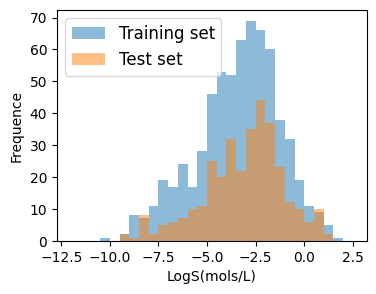

In [ ]:
bins = [(b*0.5 - 12) for b in range(0, 30)]

fig = plt.figure(figsize=(4, 3))

plt.hist(y_train, bins=bins, alpha=0.5, label="Training set")
plt.hist(y_test, bins=bins, alpha=0.5, label="Test set")
plt.xlabel("LogS(mols/L)")
plt.ylabel("Frequence")
plt.legend(fontsize=12)
plt.show()

### 5. 3. 1 回帰モデルの評価方法

### 5. 3. 2 重回帰モデル

RMSE: 0.8187


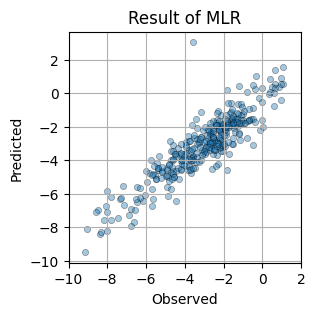

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# トレーニングデータを使ったモデル構築
mlr = LinearRegression()
mlr.fit(X_train_nona_novar_ss, y_train)

# テストデータに対する予測
y_pred = mlr.predict(X_test_nona_novar_ss)
print(f"RMSE: {round(mean_squared_error(y_test, y_pred), 4)}")

# 結果の可視化
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred,
            alpha=0.4, s=20, linewidth=0.5, edgecolors="k")
plt.xticks(np.arange(-10, 4, 2))
plt.yticks(np.arange(-10, 4, 2))
plt.title("Result of MLR")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### 5. 3. 4 正則化回帰モデル

RMSE: 0.7194


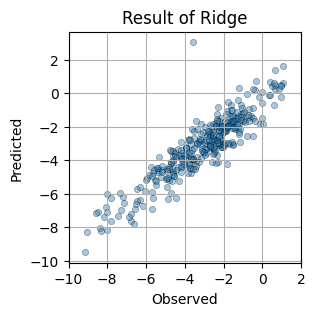

In [ ]:
from sklearn.linear_model import Ridge

# トレーニングデータを使ったモデル構築
ridge = Ridge(alpha=0.2)
ridge.fit(X_train_nona_novar_ss, y_train)

# テストデータに対する予測
y_pred = ridge.predict(X_test_nona_novar_ss)
print(f"RMSE: {round(mean_squared_error(y_test, y_pred), 4)}")

# 結果の可視化
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred,
            alpha=0.4, s=20, linewidth=0.5, edgecolors="k")
plt.xticks(np.arange(-10, 4, 2))
plt.yticks(np.arange(-10, 4, 2))
plt.title("Result of Ridge")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

RMSE: 0.7453


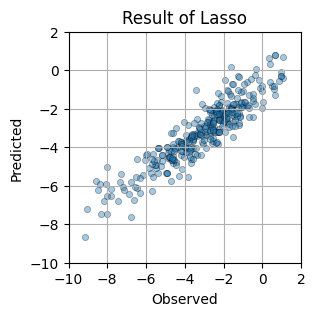

In [ ]:
from sklearn.linear_model import Lasso

# トレーニングデータを使ったモデル構築
lasso = Lasso(alpha=0.2)
lasso.fit(X_train_nona_novar_ss, y_train)

# テストデータに対する予測
y_pred = lasso.predict(X_test_nona_novar_ss)
print(f"RMSE: {round(mean_squared_error(y_test, y_pred), 4)}")

# 結果の可視化
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred,
            alpha=0.4, s=20, linewidth=0.5, edgecolors="k")
plt.xticks(np.arange(-10, 4, 2))
plt.yticks(np.arange(-10, 4, 2))
plt.title("Result of Lasso")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

### 5. 2. 4 ランダムフォレスト回帰モデル

RMSE: 0.5338


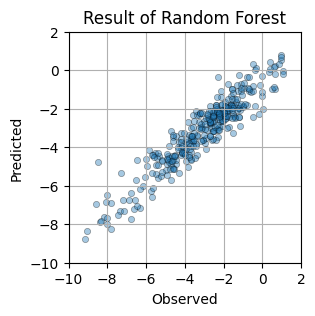

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# トレーニングデータを使ったモデル構築
rfr = RandomForestRegressor(random_state=1234)
rfr.fit(X_train_nona_novar_ss, y_train)

# テストデータに対する予測
y_pred = rfr.predict(X_test_nona_novar_ss)
print(f"RMSE: {round(mean_squared_error(y_test, y_pred), 4)}")

# 結果の可視化
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred,
            alpha=0.4, s=20, linewidth=0.5, edgecolors='k')
plt.xticks(np.arange(-10, 4, 2))
plt.yticks(np.arange(-10, 4, 2))
plt.title("Result of Random Forest")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

ハイパーパラメータを探索するために交差検証法を使う

In [ ]:
from sklearn.model_selection import GridSearchCV

最適なハイパーパラメータの推定

In [ ]:
# 調べるハイパーパラメータの設定
param_grid = {"max_depth": [20, 25, 30],
              "n_estimators":[250, 350, 450],
              "max_features": ["sqrt", "log2", None]}

# 交差検証法による最適なハイパーパラメータの決定
gs_rfr = GridSearchCV(estimator=RandomForestRegressor(random_state=1234),
                      param_grid=param_grid,
                      scoring="neg_mean_squared_error",
                      cv=10,
                      n_jobs=-1)

gs_rfr.fit(X_train_nona_novar_ss, y_train)

# 最適なハイパーパラメータを表示
print(f"Best Parameter: {gs_rfr.best_estimator_}")

Best Parameter: RandomForestRegressor(max_depth=25, max_features=None, n_estimators=350,
                      random_state=1234)


RMSE: 0.525


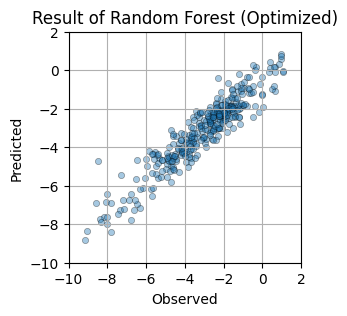

In [ ]:
# テストデータに対する予測
y_pred = gs_rfr.predict(X_test_nona_novar_ss)
print(f"RMSE: {round(mean_squared_error(y_test, y_pred), 4)}")

# 結果の可視化
plt.figure(figsize=(3, 3))
plt.scatter(y_test, y_pred,
            alpha=0.4, s=20, linewidth=0.5, edgecolors="k")
plt.xticks(np.arange(-10, 4, 2))
plt.yticks(np.arange(-10, 4, 2))
plt.title("Result of Random Forest (Optimized)")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.grid()
plt.show()

## 5. 4 判別モデル

目的変数のカテゴリ化

In [ ]:
# トレーニングデータの目的変数をカテゴリ化
y_train_class = ["Low" if y < -3 else "High" for y in y_train]

# テストデータの目的変数をカテゴリ化
y_test_class = ["Low" if y < -3 else "High" for y in y_test]

データの分布を確認

In [ ]:
ratio_low = [y_train_class.count("Low")/len(y_train_class), y_test_class.count("Low")/len(y_test_class)]
ratio_high = [y_train_class.count("High")/len(y_train_class), y_test_class.count("High")/len(y_test_class)]

print(f"Low Training: {ratio_low[0]:.4}, Test: {ratio_low[1]:.4}")
print(f"High Training: {ratio_high[0]:.4}, Test: {ratio_high[1]:.4}")

Low Training: 0.5289, Test: 0.4576
High Training: 0.4711, Test: 0.5424


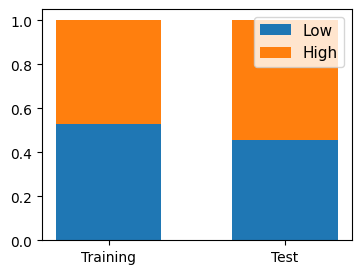

In [ ]:
fig = plt.figure(figsize=(4,3))

plt.bar(["Training", "Test"], ratio_low, width=0.6, label="Low")
plt.bar(["Training", "Test"], ratio_high, width=0.6, bottom=ratio_low, label="High")

plt.legend(fontsize=11)
plt.show()

### 5. 4. 1 判別モデルの評価方法

### 5. 4. 2 ロジスティク回帰モデル

In [ ]:
from sklearn.linear_model import LogisticRegression

lrm = LogisticRegression()
lrm.fit(X_train_nona_novar_ss, y_train_class)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_class = lrm.predict(X_test_nona_novar_ss)
confusion_matrix(y_test_class, y_pred_class)

array([[157,  22],
       [ 20, 131]])

予測精度の確認

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, y_pred_class, target_names=["Low", "High"]))

              precision    recall  f1-score   support

         Low       0.89      0.88      0.88       179
        High       0.86      0.87      0.86       151

    accuracy                           0.87       330
   macro avg       0.87      0.87      0.87       330
weighted avg       0.87      0.87      0.87       330



### 5. 4. 3 ニューラルネットワークモデル

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_nona_novar_ss, y_train_class)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
y_pred_class = mlp.predict(X_test_nona_novar_ss)
confusion_matrix(y_test_class, y_pred_class)

array([[159,  20],
       [ 24, 127]])

予測精度の確認

In [ ]:
print(classification_report(y_test_class, y_pred_class, target_names=["Low", "High"]))

              precision    recall  f1-score   support

         Low       0.87      0.89      0.88       179
        High       0.86      0.84      0.85       151

    accuracy                           0.87       330
   macro avg       0.87      0.86      0.87       330
weighted avg       0.87      0.87      0.87       330



### 5. 4. 4 サポートベクターマシン

In [ ]:
from sklearn.svm import SVC

# 調べるハイパーパラメータの設定
param_grid = [{"kernel"  : ["linear", "rbf"],
               "C"       : [2**n for n in range(1, 5, 1)],
               "gamma"   : [2**n for n in range(-15, -5, 1)]}]

# 交差検証法による最適なハイパーパラメータの決定
gs_svc = GridSearchCV(SVC(),
                      param_grid,
                      cv=10,
                      n_jobs=-1)

# 最適なハイパーパラメータでモデルを構築
gs_svc.fit(X_train_nona_novar_ss, y_train_class)

# 最適なハイパーパラメータを表示
print(f"Best Parameter: {gs_svc.best_estimator_}")

Best Parameter: SVC(C=8, gamma=0.00048828125)


In [ ]:
# 結果の計算
y_pred_class = gs_svc.predict(X_test_nona_novar_ss)
confusion_matrix(y_test_class, y_pred_class)

array([[164,  15],
       [ 18, 133]])

予測精度の確認

In [ ]:
print(classification_report(y_test_class, y_pred_class, target_names=["Low", "High"]))

              precision    recall  f1-score   support

         Low       0.90      0.92      0.91       179
        High       0.90      0.88      0.89       151

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



## 5. 5 結果の解釈

### 5. 5. 1 回帰モデルの係数

In [ ]:
feature_name = X_train_nona_novar_ss.columns

pd.DataFrame({"MLR Coef": mlr.coef_, "Ridge Coef": ridge.coef_, "Lasso Coef": lasso.coef_},
             index=feature_name).T

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_priamide,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
MLR Coef,0.125233,0.125233,-0.013266,0.057247,0.223058,-0.387126,-43.636226,2.377638,33.331238,8.611303,...,-0.051815,0.047266,0.148163,-0.049956,0.036972,0.094385,-0.067155,-0.052076,-0.148167,-0.032056
Ridge Coef,0.129876,0.129876,0.001867,0.059060,0.193115,-0.495750,-0.308192,-0.389500,-0.284100,0.263007,...,-0.026410,0.032454,0.099651,0.091624,0.089025,0.031736,-0.018296,-0.012003,-0.227873,-0.049882
Lasso Coef,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.199955,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000


### 5. 5. 2 決定木の重要度

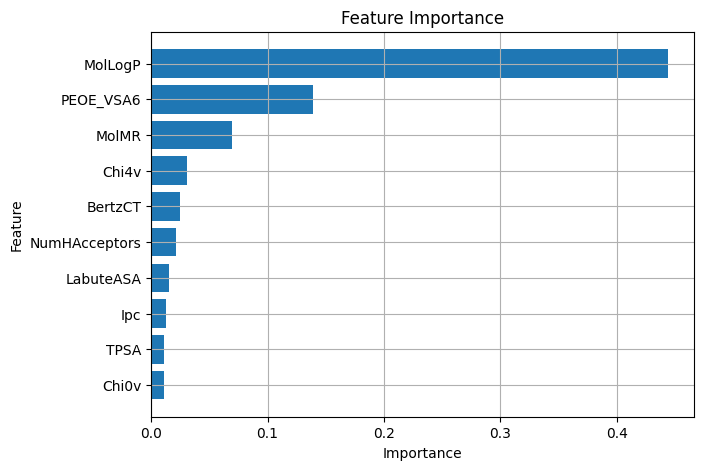

In [ ]:
forest_importances = pd.Series(gs_rfr.best_estimator_.feature_importances_, index=feature_name)
forest_importances = forest_importances.sort_values()

plt.figure(figsize=(7, 5))
plt.barh(range(10), forest_importances[174:], tick_label=forest_importances[174:].index)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()

SHAP値

In [ ]:
pip install shap

Summary Plot

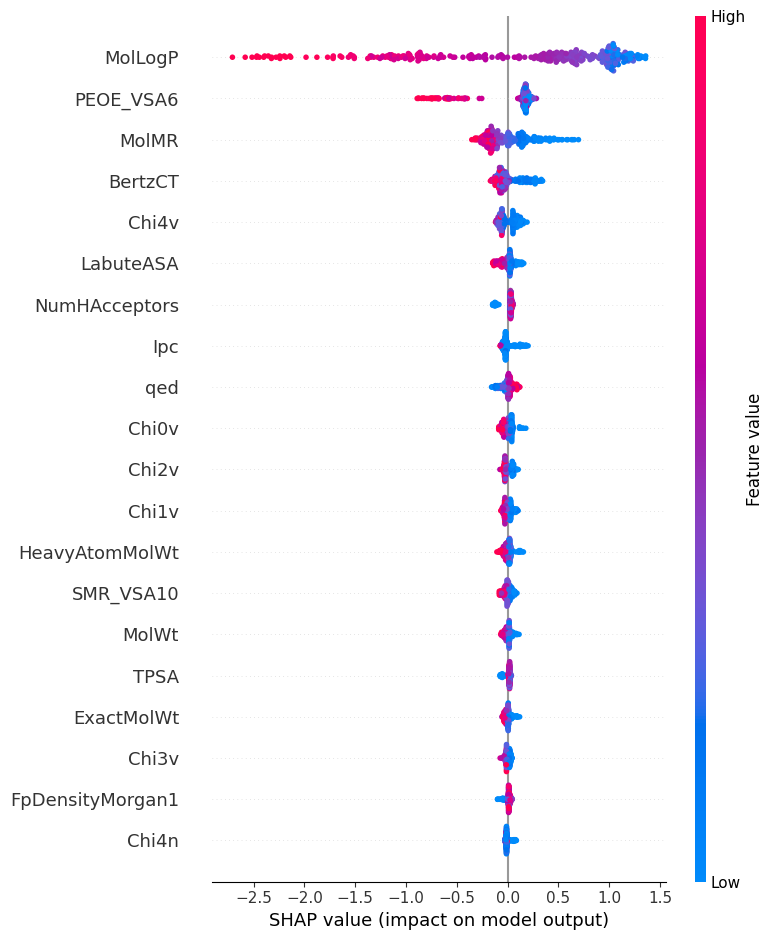

In [ ]:
import shap
shap.initjs()

# 構築したRandomForest回帰モデルを使ったSHAP値の計算
explainer = shap.TreeExplainer(model=gs_rfr.best_estimator_)
shap_values = explainer(X_test_nona_novar_ss)

# サマリープロット
shap.summary_plot(shap_values, X_test_nona_novar_ss, show=False)
plt.show()

Waterfall Plot

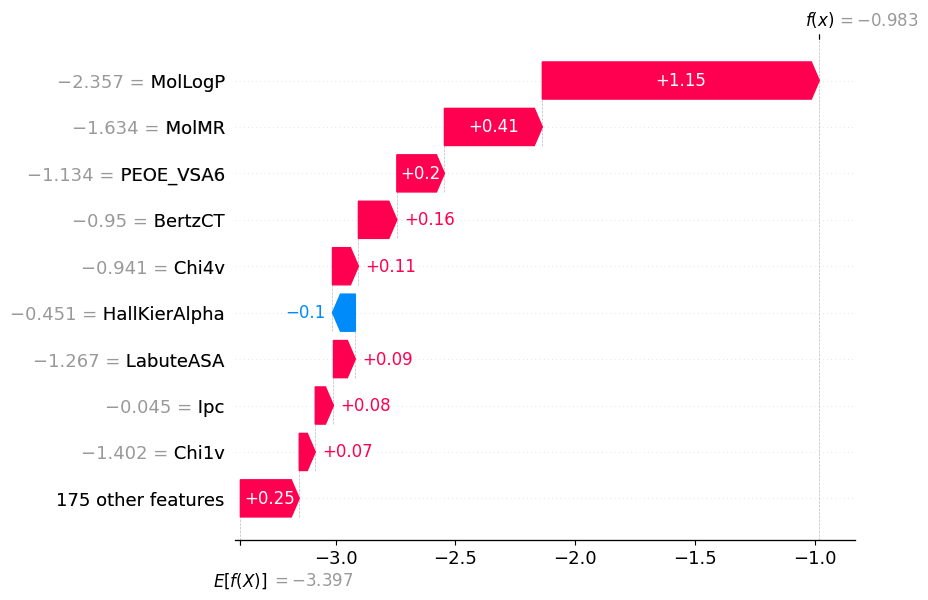

In [ ]:
idx = 3
shap.plots.waterfall(shap_values[idx], max_display=10, show=False)
plt.show()